# Stage E Quiz Solution

Oladimeji Williams
© ellipsis

---

I **Oladimeji WILLIAMS**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [Code of Conduct](https://drive.google.com/file/d/1sbR80aowp1daCnElwx3kNm0fxids0e6b/view) contained therein.


### Practical Time Series Analysis & Forecast
> The dataset for this quiz is [here](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv). In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices  of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

Data Set Information:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

1. The dataset is sampled on an hourly basis. It has the following features:

Attribute Information:

1. `FullDate`: Date in format yyyy-mm-dd  hh:mm:ss
2. `ElecPrice`: Prices of electricity charged in Kw per hour
3. `GasPrice`: power generated was done via a gas power plant, gas price is the price of gas at time-T
4. `SysLoad`: Total Load on system or Power consumed at time-T 
5. `Tmax`: maximum temperature at time-T

# Import all libraries / dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from IPython.display import Markdown

# Load the dataset

In [2]:
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

# Inspect the first few rows

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


# Inspect the shape of the dataset

In [4]:
df.shape

(92016, 5)

# Check for missing data

In [5]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
# Convert the FullDate column to DateTime object
df['FullDate']= pd.to_datetime(df['FullDate'])

# Rename the FullDate And ElecPrice to `ds` and `y` respectively
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" })

# For questions 17 to 19, rename the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] to [‘add1’, ‘add2’, ‘add3’’] respectively, as the regressors
# Rename "SysLoad", "Tmax", and "GasPrice" to "add1", "add2", and "add3" respectively
df = df.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
df.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [7]:
# Resampling from "hourly" to "daily" sample rate
df.set_index("ds", inplace= True) 
df_daily_rate = df.resample('D').sum()

In [8]:
# Inspect the shape of "df_daily_rate"
df_daily_rate.shape

(3834, 4)

# Splitting the Data into `Train` (first 2757 data) and `Test` (remaining data)

In [9]:
# Rest the index
df_daily_rate.reset_index(inplace=True)

In [10]:
#Split the dataset
train = df_daily_rate.iloc[:2757,:]
test = df_daily_rate.iloc[2757:,:]

In [11]:
train.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [12]:
test.head()

,ds,add2,add1,add3,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


### Inspect the shape after splitting

In [13]:
train.shape

(2757, 5)

In [14]:
test.shape

(1077, 5)

### 1. Which of the following best describes stationarity?

The standard deviation and the mean do not change over time

### 2. In the augemented Dickey-Fuller unit root test, a P value of < 0.05 suggests that ___

The time series is stationary

### 3. The log differencing transformation technique is used to remove ___ & ___ from a time series data

Trend & seasonality

### 4. Which time series forecasting model involves the linear combination of past time series values of the target variable to predict future values?

Integrated Moving Average

### 5. Which of these is a method employed in performing a train test split on a time series dataset?

Sliding Window

### 6. In the Arima time series forecasting model, the parameters ‘pdq’ represents____?

Number of past time steps, Number of non-seasonal defferences, Past errors / residuals

### 7. Which of these imputation methods is not suitable for a time series data that is to be used for modeling?

Backward Fill

### 8. Which of these is not a behaviour exhibited by a time series data?

Linearity

### 9. The time series model of order ___ states that the current time series value is linearly dependent on the past p values with some white noise?

AR, order p

### 10. The ___ model of order ___ says that the time series is linearly dependent on current and past shock values or noise?

MA model, order q

### 11.  Which of the following is a plot of `ElecPrice` over time?

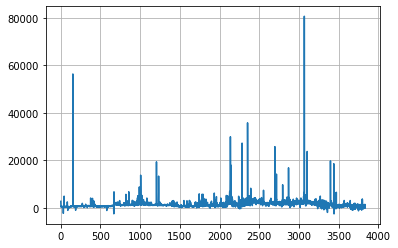

In [15]:
df_daily_rate.y.plot()
plt.grid()

###  12.  Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [16]:
pv_sysload = adfuller(df_daily_rate['add1']) # Since "SysLoad" has been renamed to "add1" initially
pv_gasprice = adfuller(df_daily_rate['add3']) # Since "GasPrice" has been renamed to "add3" initially
round(pv_sysload[1], 6), round(pv_gasprice[1], 6)

(0.004254, 0.045027)

### 13.  Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [17]:
cv_elecprice = adfuller(df_daily_rate['y'])
round(pv_gasprice[4]['10%'], 4), round(cv_elecprice[4]['5%'], 4)

(-2.5672, -2.8623)

### 14.  Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [18]:
# Define the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [19]:
model_1 = Prophet() 
model_1.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
pred_1 = model_1.predict(test) 
mape(test['y'],pred_1['yhat'])

549.48

### 15.  What is the RMSE in 2 decimal places?

In [21]:
# Define the RMSE function
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [22]:
rmse(test['y'], pred_1['yhat'])

3218.16

### 16.  If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

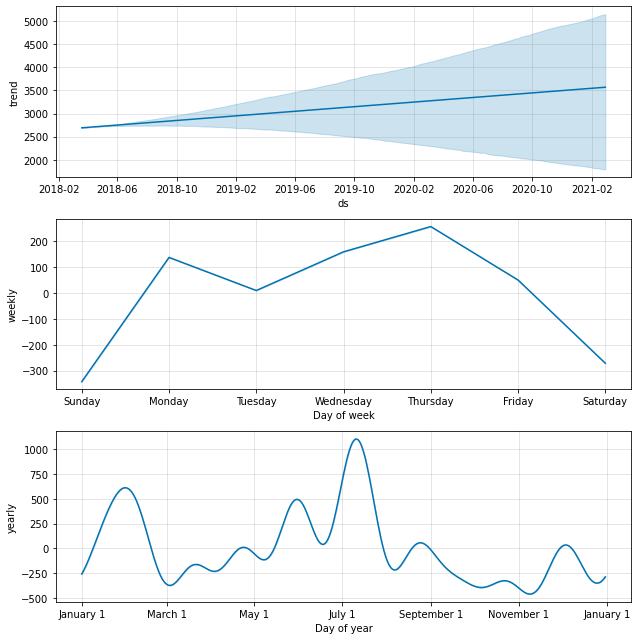

In [23]:
model_1.plot_components(pred_1) 
plt.show()

### 17  Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [24]:
model_2 = Prophet()
model_2.add_regressor("add1")
model_2.add_regressor("add2")
model_2.add_regressor("add3")
model_2.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
pred_2 = model_2.predict(test) 
mape(test['y'], pred_2['yhat'])

231.28

### 18 What is the RMSE in 2 decimal places?

In [26]:
rmse(test['y'], pred_2['yhat'])

2706.92

### 19  If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

Options

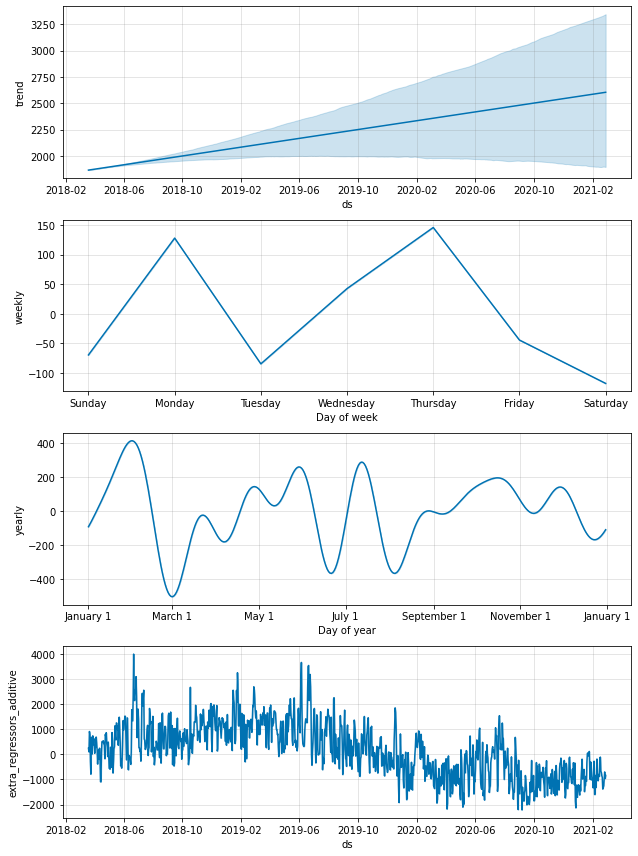

In [27]:
model_2.plot_components(pred_2) 
plt.show()

### 20  Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

### What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [28]:
# Train the forecast model without "Tmmax"
model_3 = Prophet()
model_3.add_regressor('add1') # since "SysLoad" has been renamed to "add1" initially
model_3.add_regressor('add3') # since "GasPrice" has been renamed to "add3" initially
model_3.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
pred_3 = model_3.predict(test) 
mape(test['y'], pred_3['yhat'])

233.72